# **Loading the Reuters dataset:**

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 11s 5us/step


# **Decoding newswires back to text:**

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 2s 4us/step


# **Encoding the data:**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
       results = np.zeros((len(sequences), dimension))
       for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
       return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
      results = np.zeros((len(labels), dimension))
      for i, label in enumerate(labels):
       results[i, label] = 1.
      return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# **Model definition:**

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

c:\Users\muqad\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compling the Model:**

In [6]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# **Training the Model:**

In [8]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5172 - loss: 2.6128 - val_accuracy: 0.6350 - val_loss: 1.7449
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6938 - loss: 1.4653 - val_accuracy: 0.7120 - val_loss: 1.3208
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7611 - loss: 1.1124 - val_accuracy: 0.7470 - val_loss: 1.1550
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8083 - loss: 0.8996 - val_accuracy: 0.7620 - val_loss: 1.0643
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8398 - loss: 0.7455 - val_accuracy: 0.7820 - val_loss: 0.9868
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8693 - loss: 0.6207 - val_accuracy: 0.7940 - val_loss: 0.9445
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8898 - loss: 0.5216 - val_accuracy: 0.8050 - val_loss: 0.9247
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9025 - loss: 0.4411 - val_accuracy: 0.8030 - v

# **Plotting the Training and Validation loss:**

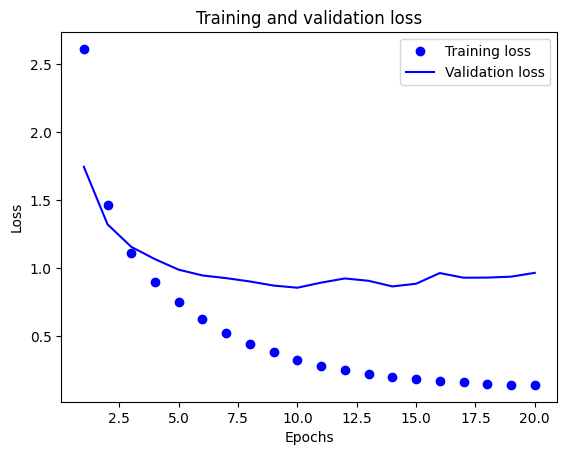

In [9]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Plotting the training and Validation Accuracy:**

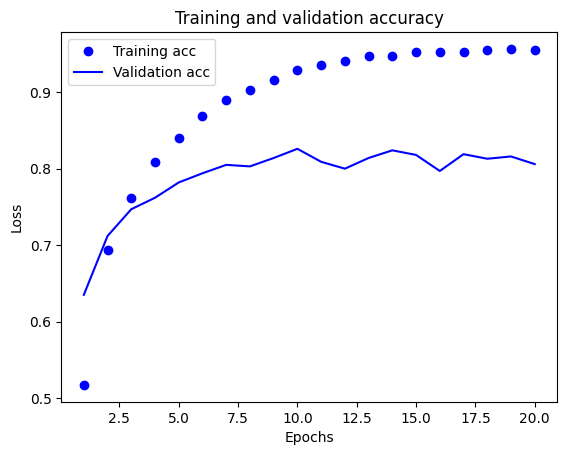

In [10]:
plt.clf()
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Confusion Matrix:**

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


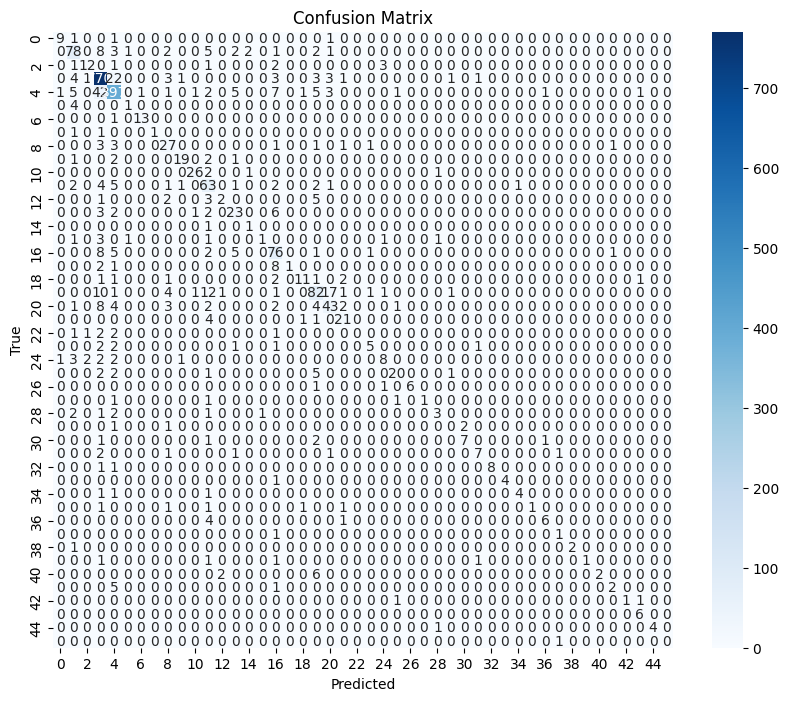

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(one_hot_test_labels, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




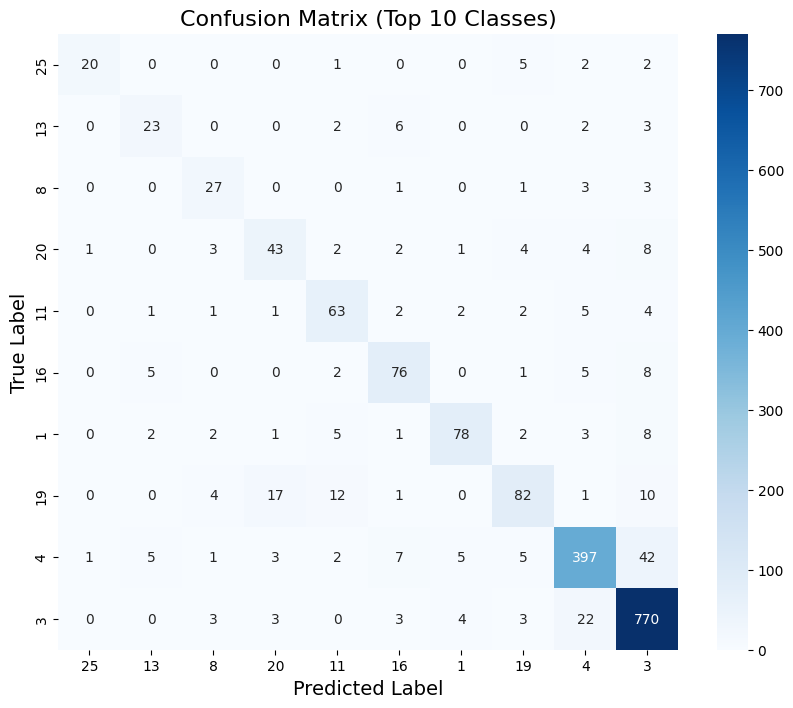

In [15]:
import numpy as np

# Count frequency of each true label
class_counts = np.bincount(y_true)
top_classes = np.argsort(class_counts)[-10:]  # pick top 10 classes

# Mask confusion matrix to top classes
cm_top = cm[np.ix_(top_classes, top_classes)]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_top, annot=True, fmt="d", cmap="Blues",
            xticklabels=top_classes, yticklabels=top_classes)
plt.title("Confusion Matrix (Top 10 Classes)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()


# **Prediction on test data:**

In [16]:
# Pick one sample from test set
sample_index = 10
sample = x_test[sample_index].reshape(1, -1)

# Prediction
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

print("Decoded newswire text:\n")
decoded_sample = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[sample_index]])
print(decoded_sample)
print("\nTrue Label:", test_labels[sample_index])
print("Predicted Label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Decoded newswire text:

? grain traders said they were still awaiting results of yesterday's u k intervention feed wheat tender for the home market the market sought to buy 340 000 tonnes more than double the remaining 150 000 tonnes available under the current tender however some of the tonnage included ? bids for supplies in the same stores since the tenders started last july ? 000 tonnes of british feed wheat have been sold back to the home market reuter 3

True Label: 5
Predicted Label: 1


In [19]:
sample_index = 15
sample = x_test[sample_index].reshape(1, -1)

# Prediction
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

decoded_sample = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[sample_index]])

print("Newswire text:\n", decoded_sample[:300], "...")
print("\nTrue label:", test_labels[sample_index])
print("Predicted label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Newswire text:
 ? leading domestic semiconductor makers will boost imports and cut production of key memory microchips from next month in line with government attempts to ward off u s trade sanctions company spokesmen said the moves might persuade the u s to call off the sanctions despite obstacles to full implemen ...

True label: 11
Predicted label: 11
